



타이타닉 데이터로 EDA 연습


 -  어떤데이터인지 파악, 컬럼에서 어떤 데이터들이있는지 파악하기
 -  결측치 확인하기
 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings(action='ignore') 

# netflix 데이터 블러오기
netflix = pd.read_csv("data/netflix_titles.csv")

# 데이터에 어떤요소들이 있는지 간략하게 확인하기
netflix.head()

In [150]:
print(netflix.isnull().sum()) # 결측치 확인

show_id            0
type               0
title              0
director        1969
cast               0
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


unique_years = netflix['release_year'].unique()
sorted_years = sorted(unique_years)
sorted_years



- 우선파악하기쉬운 데이터 콘텐츠 타입 시각화

- 성공하면 나머지 데이터 다양하게 표현해보기



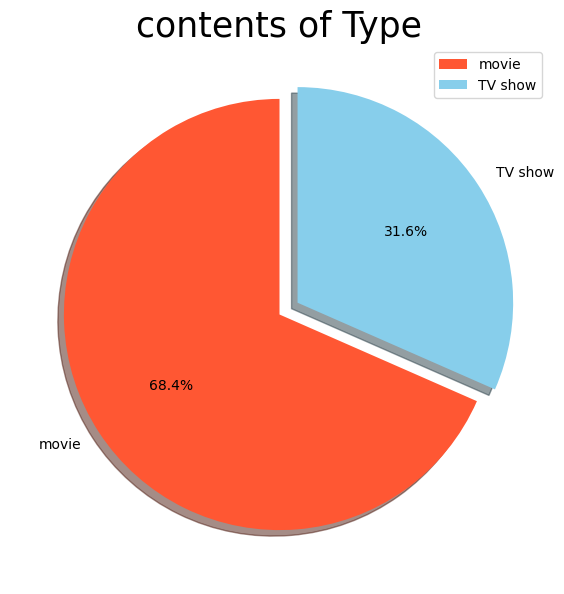

In [141]:

netflix['type'].value_counts() 
labels = ['movie', 'TV show']
plt.rcParams['figure.figsize'] = (7, 7)
custom_colors = ['#FF5733', 'skyblue'] 
plt.pie(size,labels=labels, colors = custom_colors, explode = explode, shadow = True, startangle = 90 , autopct='%.1f%%') 
plt.title('contents of Type', fontsize = 25)
plt.legend() 
plt.show()


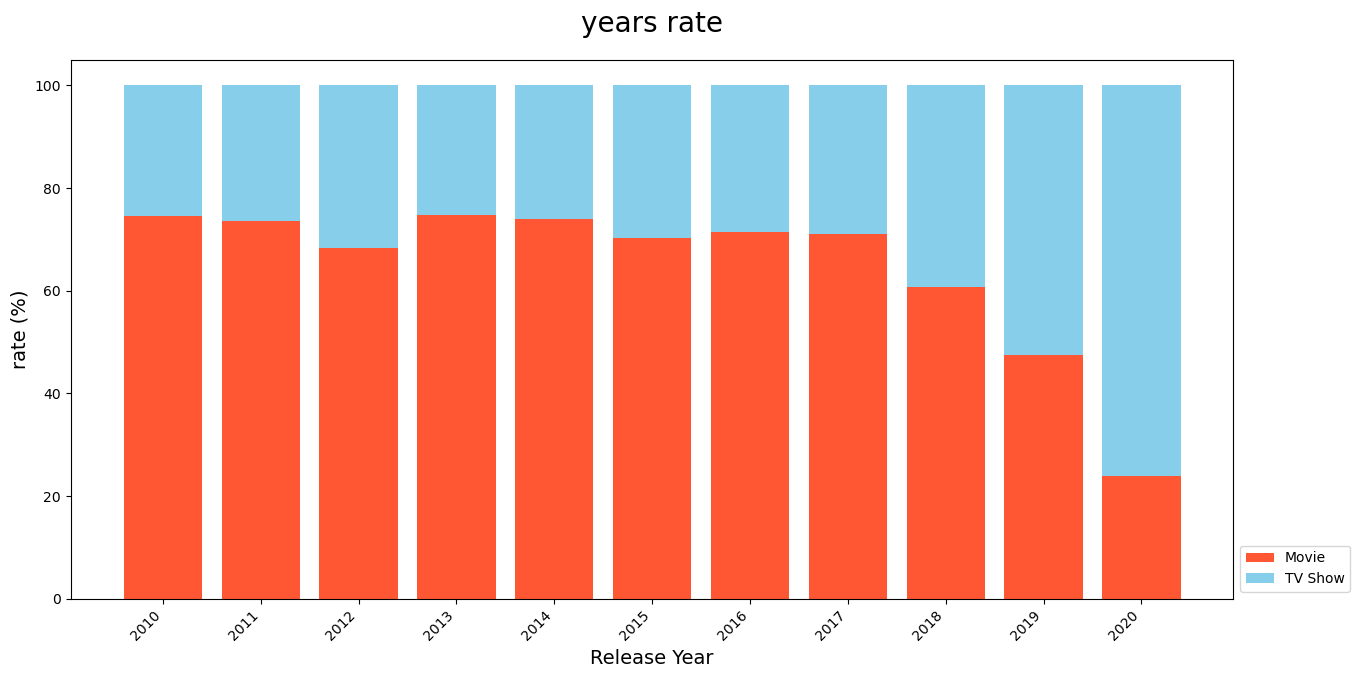

In [144]:

netflix_2010 = netflix[netflix['release_year'] >= 2010] 
yearly_distribution = netflix_2010.groupby('release_year')['type'].value_counts().unstack().fillna(0) 
yearly_total = yearly_distribution['Movie'] + yearly_distribution['TV Show'] 

fig, ax = plt.subplots(figsize=(15, 7))


ax.bar(yearly_ratio.index, yearly_ratio['Movie'], label='Movie', color='#FF5733')

# 그 위에 'TV Show' 비율을 누적하여 그립니다.
ax.bar(yearly_ratio.index, yearly_ratio['TV Show'], 
       label='TV Show', 
       bottom=yearly_ratio['Movie'], # Movie 위에 누적
       color='skyblue')


ax.set_title('years rate', fontsize=20, pad=20)
ax.set_xlabel('Release Year', fontsize=14)
ax.set_ylabel('rate (%)', fontsize=14)


ax.set_xticks(yearly_ratio.index) 
plt.xticks(rotation=45, ha='right') 

plt.legend(loc='lower left', bbox_to_anchor=(1, 0)) 

plt.show()

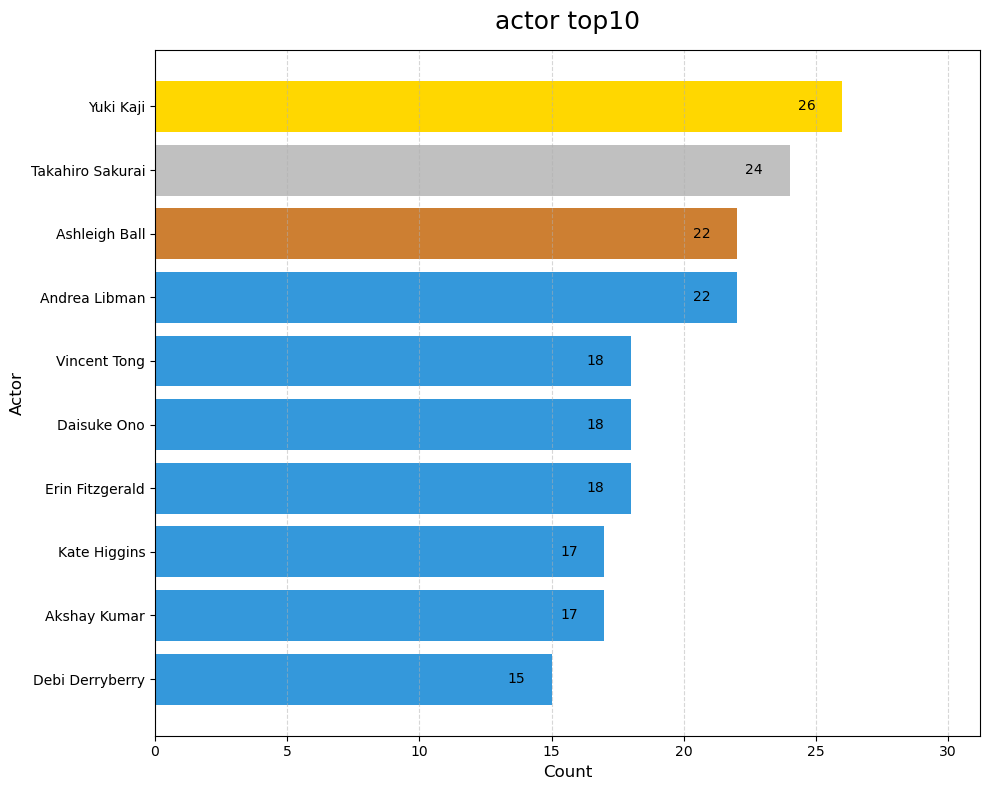

In [140]:

netflix_2010s = netflix[netflix['release_year'] >= 2010].copy() 

netflix_2010s['cast'] = netflix_2010s['cast'].fillna('')
cast_list = netflix_2010s['cast'].str.split(', ', expand=False)

exploded_df = netflix_2010s.assign(single_cast=cast_list).explode('single_cast') 
exploded_df = exploded_df[exploded_df['single_cast'] != '']

#  상위 10명 
top_10_casts = exploded_df['single_cast'].value_counts().head(10)

casts = top_10_casts.index    
counts = top_10_casts.values  
num_items = len(counts)


#  막대별 색상 리스트 생성 (상위 3명 강조)

color_1 = '#FFD700'  # 1등: 금색
color_2 = '#C0C0C0'  # 2등: 은색
color_3 = '#CD7F32'  # 3등: 동색
color_rest = '#3498db' # 4등 이하: 파란색

# 막대 그래프는 오름차순(10등 -> 1등)으로 그려지므로, 색상도 그 순서대로 정의해야 합니다.
colors = [color_rest] * 7      # 10등부터 4등까지 (7개)
colors.append(color_3)         # 3등
colors.append(color_2)         # 2등
colors.append(color_1)         # 1등

plt.figure(figsize=(10, 8)) 

plt.barh(casts[::-1], counts[::-1], color=colors) 

plt.title('actor top10', fontsize=18, pad=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Actor', fontsize=12)

for i in range(num_items):
  
    x_pos_count = counts[::-1][i] - 1 

    # y 위치: 막대 중앙
    y_pos = i 
    

    plt.text(x_pos_count, y_pos, 
             f'{counts[::-1][i]}', 
             va='center', 
             ha='right', # 우측 정렬 유지
             fontsize=10, 
             color='black') 
             
plt.xlim(0, counts.max() * 1.2) 

plt.grid(axis='x', linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()


